# Your Details

Your Name: Divya Acharya

Your ID Number:23283742

# Etivity 2 - Task 1: Hyperparamter Tuning - Improving your Deep Neural Network!

You will need to have completed Task 2 of Etivity 1! in order to do this assignment.

The aim of this task is to improve your dog vs. cat DNN model for which you'll use the functions from the previous assignment to optimize a deep layer neural network using hyperparameter tuning. There are 3 main exercise parts to this task.

1. Apply weight parameter initializations to the learning process.
2. Use L2 regularization in your deep learning model.
3. Apply dropout regularization.

Training your neural network requires specifying an initial value of the weights. A well-chosen initialization method helps the learning process. In this notebook, you'll try out a few different initializations, including random, zeros, and He initialization, and see how each leads to different results.

Deep Learning models have so much flexibility and capacity that **overfitting can be a serious problem**, if the training dataset is not big enough, it does well on the training set, but the learned network **doesn't generalize to new examples** that it has never seen!

**For this assignment you will be need to complete the following exercises:**

- Section 3: [Exercise 1-1](#ex-1), [Exercise 1-2](#ex-2), [Exercise 1-3](#ex-3): Analyze various initialization methods to speed up the convergence of gradient descent and to increase the odds of gradient descent converging to a lower training. (and generalization) error 
- Section 4: [Exercise 2-1](#ex-4), [Exercise 2-2](#ex-5): Implement L2 regularization in your model to help overcome overfitting.
- Section 5: [Exercise 3-1](#ex-6), [Exercise 3-2](#ex-7): Evaluate Droprout regularization in your model.


## Important Note on Submission 

There are 3 main exercises to complete in this task. Use notes provided to help you build understanding. Insert your code entries for each of these exercises. Please make sure to enter your code after this line so that grading can easily be assessed.

**\# ENTER CODE HERE**


Please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

## Table of Contents
- [1 - Packages](#1)
- [2 - Load and Process the Dataset](#2)
- [3 - L layer Model Neural Network- Parameter Initialization](#3)
    - [3.1 - Random Initialization](#3-1)
        - [Exercise 1.1 - initialize_parameters_random](#ex-1)
    - [3.2 - Xavier Initialization](#3-2)
        - [Exercise 1.2 - initialize_parameters_xavier](#ex-2)
    - [3.3 - He Initialization](#3-3)
        - [Exercise 1.3 - initialize_parameters_he](#ex-3)
- [4 - L-layer Neural Network with L2 regularization](#4)
    - [4.1 - Regularized Model](#4-1)
    - [4.2 - L2 Regularization](#4-2)
        - [Exercise 2.1 - compute_cost_with_regularization](#ex-4)
        - [Exercise 2.2 - linear_backward_with_regularization](#ex-5)        
- [5 - L-layer Neural Network with Dropout](#5)
    - [5.1 - Dropout Model](#5-1)
    - [5.2 - Forward Propagation with Dropout](#5-1)
        - [Exercise 3.1 - drop_out_matrices and L_model_forward_with_dropout](#ex-6)
    - [5.3 - Backward Propagation with Dropout](#5-1)
        - [Exercise 3.2 - L_model_backward_with_dropout](#ex-7)
- [6 - Results Analysis](#6)
- [7 - Test with your own image (optional/ungraded exercise)](#7)

<a name='1'></a>
## 1 - Packages

Begin by importing all the packages you'll need during this assignment. 

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- [pandas](https://pandas.pydata.org/) is a powerful, flexible and easy to use open source data analysis and manipulation tool that also allos us to plot data visually.
- [os](https://docs.python.org/3/library/os.html)  This package provides a portable way of using operating system dependent functionality.
- `dnn_fucntions` provides the encrypted functions implemented in the "Improving your Deep Neural Network: Step by Step" assignment to this notebook. You will need to  copy the "dist" folder into your directory structure.
- `np.random.seed(1)` is used to keep all the random function calls consistent. It helps grade your work - so please don't change it! 

In [ ]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import os

from PIL import Image
from scipy import ndimage
os.chdir ("dist")
from dnn_functions import *
os.chdir ("..")

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

<a name='2'></a>
## 2 - Load and Process the Dataset

You'll load the exam same datset that you used in Activity 1 - Part 2 for the Cat vs. Dog classification exercise. Recall that we only have 1250 images in total. For this exercise, we will assign 75% of the images for the training set and 25% of the images for the test set.

In [3]:
 X_train, Y_train, X_test, Y_test, classes = load_dataset()

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to check out other images. 

y = 1. It's a dog picture.


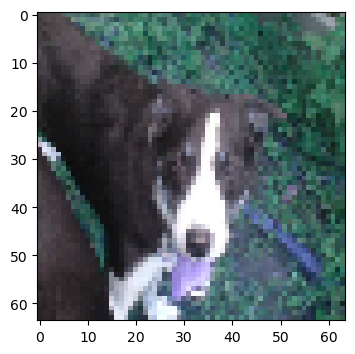

In [4]:
# Example of a picture
index = 3
#classes = ['cat', 'dog']
plt.imshow(X_train[index])
print ("y = " + str(Y_train[0,index]) + ". It's a " + classes[Y_train[0,index]]  +  " picture.")

In [5]:
# Explore your dataset 
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("Train_x shape: " + str(X_train.shape))
print ("Train_y shape: " + str(Y_train.shape))
print ("Test_x shape: " + str(X_test.shape))
print ("Test_y shape: " + str(Y_test.shape))

Number of training examples: 937
Number of testing examples: 313
Each image is of size: (64, 64, 3)
Train_x shape: (937, 64, 64, 3)
Train_y shape: (1, 937)
Test_x shape: (313, 64, 64, 3)
Test_y shape: (1, 313)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvector_dog_reshaped.png" style="width:450px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Image to vector conversion.</font></center></caption>

In [6]:
# Reshape the training and test examples 
train_x_flatten = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_test.reshape(X_test.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

train_y = Y_train;
test_y = Y_test;
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 937)
test_x's shape: (12288, 313)


**Note**:
$12,288$ equals $64 \times 64 \times 3$, which is the size of one reshaped image vector.

<a name='3'></a>
## 3 - L-Layer Neural Network - Parameter Initialization

###  Test the L_layer_model with different parameter initializations

You'll use a L-layer neural network (already implemented for you). These are the initialization methods you'll experiment with: 
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to  random values.  
- *Xavier initialization* --  setting `initialization = "xavier"` in the input argument. This initializes the weights to random values scaled according to a paper by Xavier (Glorot), 2010.
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

**Instructions**: Instructions: Read over the code below, and run it. In the next part, you'll implement the three initialization methods that this `model()` calls.

In [7]:
# L_layer_model

def L_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, initialization = "xavier"):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if dog), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    initialization -- flag to choose which initialization to use ("random","xavier" or "he")
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Initialize parameters dictionary.
    if initialization == "random":
        parameters = initialize_parameters_random(layer_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layer_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layer_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)        
         
        # Compute cost.
        cost = compute_cost(AL, Y)
   
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                  
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
   
    return parameters, costs

def plot_costs(costs, learning_rate = 0.0075):
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.plot(costs)   
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundereds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    

<a name='3-1'></a>
## 3.1 - Random Initialization

There are two types of parameters to initialize in a neural network:
- The weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- The bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$]

Initialize the weights randomly so that each neuron can then proceed to learn a different function of its inputs. In this exercise, you'll see what happens when the weights are initialized randomly to large values.

<a name='ex-1'></a>
### Exercise 1.1 - initialize_parameters_random

Implement the following function to initialize your weights to relatively large random values (scaled by \*0.20) and your biases to zeros. Use `np.random.randn(..,..) * 0.2` for weights and `np.zeros((.., ..))` for biases. You're using a fixed `np.random.seed(..)` to make sure your "random" weights match the teaching assistants, so don't worry if running your code several times always gives you the same initial values for the parameters. 

In [8]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims) - 1            # number of layers in the network

    for l in range(1, L +1):       
        # ENTER CODE HERE (~ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.2
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
                                            
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

#### Set up your layer dimensions  for this exercise
Run the cell below to set up as a 4-layer neural network. 

In [9]:
### CONSTANTS ###
layer_dims = [12288, 20, 7, 5, 1] #  4-layer model with 3 hidden layers and 1 output layers

**Train using random initialization**
- Train your model as a 4 layer neural network
- The cost should decrease on every iteration. 
- It may take up to 5 minutes to run 2500 iterations. 

Cost after iteration 0: 1.1217906111753624
Cost after iteration 100: 0.6948665804545315
Cost after iteration 200: 0.6934603070060911
Cost after iteration 300: 0.6928187336986221
Cost after iteration 400: 0.6922775612674996
Cost after iteration 500: 0.6917980330292015
Cost after iteration 600: 0.6913249720537195
Cost after iteration 700: 0.6908835979561846
Cost after iteration 800: 0.6904870283639152
Cost after iteration 900: 0.6901035743688315
Cost after iteration 1000: 0.6897242971354098
Cost after iteration 1100: 0.689353153864929
Cost after iteration 1200: 0.688982304400992
Cost after iteration 1300: 0.6885966608719711
Cost after iteration 1400: 0.688199059485654
Cost after iteration 1500: 0.6877806159732588
Cost after iteration 1600: 0.6873247907275687
Cost after iteration 1700: 0.6868477425185491
Cost after iteration 1800: 0.6863517356933093
Cost after iteration 1900: 0.6858443440346538
Cost after iteration 2000: 0.6852909316542795
Cost after iteration 2100: 0.6847267403812888
Cos

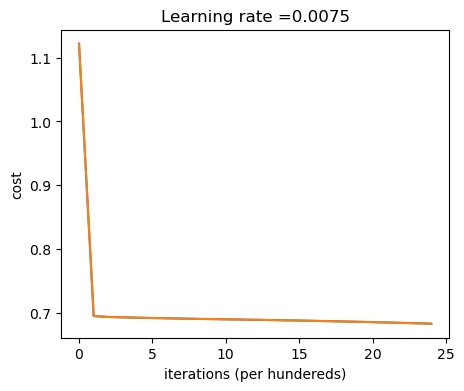

On the training set:
Accuracy: 0.5613660618996799
On the test set:
Accuracy: 0.5079872204472844


In [70]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, initialization = "random")
plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

<a name='3-2'></a>
## 3.2 - Xavier Initialization

Lets' try "Xavier Initialization"; this is named for the first author of Xavier (Glorot), 2010. Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])`.

<a name='ex-2'></a>
### Exercise 1.2 - initialize_parameters_xavier

Implement the following function to initialize your parameters with Xavier initialization. This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 0.20, you will multiply it by $\sqrt{\frac{1}{\text{dimension of the previous layer}}}$. Xavier initialization is recommended for layers with a sigmoid or tanh activation, but seems to work well in this DNN example.

In [10]:
# GRADED FUNCTION: initialize_parameters_xavier

def initialize_parameters_xavier(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        # ENTER CODE HERE (~ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(1 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))           
        
    return parameters

**Train using xavier initialization**

Cost after iteration 0: 0.6954297337029984
Cost after iteration 100: 0.6871585300723855
Cost after iteration 200: 0.6812055096009232
Cost after iteration 300: 0.6742176131549125
Cost after iteration 400: 0.6655681478471375
Cost after iteration 500: 0.6550738707478774
Cost after iteration 600: 0.6423886675982882
Cost after iteration 700: 0.6291417908346856
Cost after iteration 800: 0.6184001398701768
Cost after iteration 900: 0.6092446444766251
Cost after iteration 1000: 0.5959286899206339
Cost after iteration 1100: 0.5847022966428018
Cost after iteration 1200: 0.5712359635093074
Cost after iteration 1300: 0.5601785817258569
Cost after iteration 1400: 0.5280010458070769
Cost after iteration 1500: 0.5265111555525654
Cost after iteration 1600: 0.49350754432569816
Cost after iteration 1700: 0.47896621934161143
Cost after iteration 1800: 0.45986415598458935
Cost after iteration 1900: 0.49949222205478994
Cost after iteration 2000: 0.48167960004202603
Cost after iteration 2100: 0.434998836404

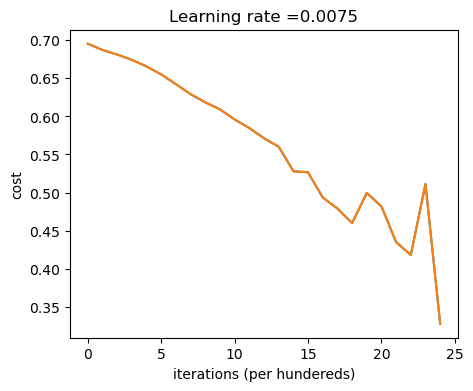

On the training set:
Accuracy: 0.9103521878335111
On the test set:
Accuracy: 0.597444089456869


In [72]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, initialization = "xavier")
plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

**Expected Output**:

<table>
    <tr>
    <td> <b>Train Accuracy</b></td>
    <td> 0.910</td>
    </tr>
</table>

<table> 
    <tr>
        <td> <b>Test Accuracy</b></td>
        <td> 0.597 </td>
    </tr>
</table>

<a name='3-3'></a>
## 3.3 - He Initialization

Finally, lets' try "He Initialization"; this is named for the first author of He et al., 2015. He initialization uses `sqrt(2./layers_dims[l-1])`.)

<a name='ex-3'></a>
### Exercise 1.3 - initialize_parameters_he

Implement the following function to initialize your parameters with He initialization. This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 0.20, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is the initialization recommended for layers with a ReLU activation. 

In [11]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        # ENTER CODE HERE (~ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))           
        
    return parameters

**Train using He initialization**

Cost after iteration 0: 0.7309652458935444
Cost after iteration 100: 0.6869849151160008
Cost after iteration 200: 0.6714311002442204
Cost after iteration 300: 0.6506151849535102
Cost after iteration 400: 0.6311668373828823
Cost after iteration 500: 0.6067266852935249
Cost after iteration 600: 0.5984518370145503
Cost after iteration 700: 0.5828519984270806
Cost after iteration 800: 0.5406651904786002
Cost after iteration 900: 0.5922034058071899
Cost after iteration 1000: 0.5159944953431456
Cost after iteration 1100: 0.4758104918634099
Cost after iteration 1200: 0.4923722730974817
Cost after iteration 1300: 0.5061921045807254
Cost after iteration 1400: 0.48968953263538706
Cost after iteration 1500: 0.5551608321584105
Cost after iteration 1600: 0.5269419661961215
Cost after iteration 1700: 0.44091683844312973
Cost after iteration 1800: 0.37195428324131913
Cost after iteration 1900: 0.36592813135870894
Cost after iteration 2000: 0.31955670219861476
Cost after iteration 2100: 0.354592080728

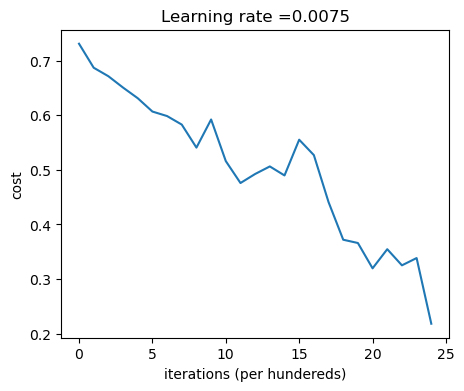

On the training set:
Accuracy: 0.823906083244397
On the test set:
Accuracy: 0.5654952076677315
{'W1': array([[ 0.0227537 ,  0.00549858,  0.00115285, ...,  0.00956261,
         0.00999736, -0.0260214 ],
       [-0.02765146, -0.01850146, -0.01249427, ..., -0.01680699,
         0.01756926,  0.02090708],
       [ 0.01160583,  0.01603399, -0.00492121, ..., -0.01204844,
         0.01483801, -0.00660591],
       ...,
       [ 0.00175004,  0.01478597, -0.01460001, ..., -0.02292311,
         0.01204992,  0.00760587],
       [ 0.00554658,  0.02196392,  0.00978521, ..., -0.003838  ,
        -0.00446667,  0.01598424],
       [ 0.01351642,  0.00664892, -0.00181062, ...,  0.00674859,
         0.00341255, -0.00832395]]), 'b1': array([[ 5.43764558e-05],
       [-4.82639932e-03],
       [ 6.21459072e-03],
       [-1.42795086e-02],
       [-1.36915507e-02],
       [-1.34091694e-02],
       [-2.41944382e-03],
       [-1.24750436e-03],
       [ 1.99762268e-02],
       [ 1.54100210e-02],
       [ 4.8339553

In [99]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, initialization = "he")
plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)
print(parameters)

### Congrats! It seems that He Initialization gives the best results 
Tabulate the set of results you have achieved for the 3 types of parameter iniatilizations.



We note that the non-regularized model is obviously overfitting the training set. It is fitting the noisy points! Lets now look at two techniques to reduce overfitting.

<a name='4'></a>
## 4 - L-layer Neural Network with L2 regularization

<a name='4-1'></a>
## 4.1 - Regularized Model

You will use the following neural network (already implemented for you below). This model can be used in *regularization mode* by:
- setting the `lambd` input to a non-zero value. We use "`lambd`" instead of "`lambda`" because "`lambda`" is a reserved keyword in Python. 

You will implement:
- *L2 regularization* -- functions: "`compute_cost_with_regularization()`" and "`backward_propagation_with_regularization()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [12]:
# L_layer_model with L2 regularization - model()

def L_layer_model_reg(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost=True, initialization = "xavier", lambd = 0):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if dog), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    initialization -- flag to choose which initialization to use ("random","xavier" or "he")
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    m = X.shape[1]                     # number of training examples

    # Initialize parameters dictionary.
    if initialization == "random":
        parameters = initialize_parameters_random(layer_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layer_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layer_dims)
           
    # Loop (gradient descent)
    for i in range(0, num_iterations):    
            
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)  
    
        # Compute cost.
        if lambd == 0:
            cost = compute_cost(AL, Y)
        else:
            cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
            
        # Backward propagation.
        if lambd == 0:
            grads = L_model_backward(AL, Y, caches)
        else:
            grads = L_model_backward_with_regularization(AL, Y, caches, lambd)

            
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                  
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
   
    return parameters, costs

def plot_costs(costs, learning_rate = 0.0075):
    # plot the cost
    #plt.plot(np.squeeze(costs))
    plt.plot(costs)   
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundereds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    

<a name='5-2'></a>
## 5.2 - L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

<a name='ex-4'></a>
### Exercise 2.1 - compute_cost_with_regularization
Implement `compute_cost_with_regularization()` which computes the cost given by equation (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that you have to do this for $W^{[1]}$, $W^{[2]}$,..., $W^{[L]}$, then sum the terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [13]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(AL, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    AL -- post-activation, output of forward propagation, of shape (output size, number of examples)
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)

    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    L = len(parameters) // 2 # number of layers in the neural network
    cross_entropy_cost = compute_cost(AL, Y) # This gives you the cross-entropy part of the cost
       
    # ENTER CODE HERE (2~4 lines of code)   
    L2_regularization_cost = 0
    for l in range(1, L + 1):
        L2_regularization_cost += np.sum(np.square(parameters['W' + str(l)]))
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

Of course, because you changed the cost, you have to change backward propagation as well! All the gradients have to be computed with respect to this new cost. 

<a name='ex-5'></a>
### Exercise 2.2 - linear_backward_with_regularization
Implement the changes needed in backward propagation to take into account regularization. This fucntion is called by the L_model_backward_with_regularization() function in the main model. The changes only concern dW1, dW2, ..., dWL. For each, you have to add the regularization term's gradient ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [14]:
# GRADED FUNCTION: linear_backward_propagation_with_regularization

def linear_backward_with_regularization(dZ, cache, lambd):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    # ENTER CODE HERE (~ 1 line of code)
    dW = 1./m * np.dot(dZ, A_prev.T) + lambd / m * W

    
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

Cost after iteration 0: 65.66973839357006
Cost after iteration 100: 65.54760227317371
Cost after iteration 200: 65.503631391541
Cost after iteration 300: 65.52562624938413
Cost after iteration 400: 65.62290994000246
Cost after iteration 500: 65.76667024473987
Cost after iteration 600: 65.96077308631016
Cost after iteration 700: 66.17673042306266
Cost after iteration 800: 66.43515820429293
Cost after iteration 900: 66.70024249271293
Cost after iteration 1000: 67.04005871038675
Cost after iteration 1100: 67.34069605776374
Cost after iteration 1200: 67.63407356027282
Cost after iteration 1300: 68.01312968019329
Cost after iteration 1400: 68.34634832134174
Cost after iteration 1500: 68.7483734725166
Cost after iteration 1600: 69.3510026241916
Cost after iteration 1700: 69.65839259565278
Cost after iteration 1800: 69.96049387953278
Cost after iteration 1900: 70.41567908997482
Cost after iteration 2000: 70.9487883701926
Cost after iteration 2100: 71.24691421277684
Cost after iteration 2200: 

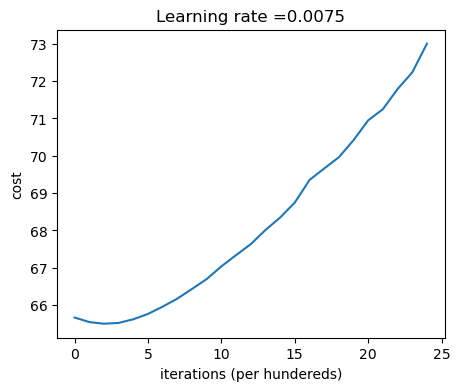

On the training set:
Accuracy: 0.8292422625400213
On the testset:
Accuracy: 0.5335463258785942


In [80]:
layer_dims = [12288, 20, 7, 5, 1] 
parameters, costs = L_layer_model_reg(train_x, train_y, layer_dims, initialization = "he", lambd=0.8)

plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the testset:")
pred_test = predict(test_x, test_y, parameters)

**Observations**:
- The value of $\lambda$ is a hyperparameter that you can tune using a dev set.
- L2 regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?**:

L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes. 

<br>
<font color='blue'>
    
**What you should remember:** the implications of L2-regularization on:
- The cost computation:
    - A regularization term is added to the cost.
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices.
- Weights end up smaller ("weight decay"): 
    - Weights are pushed to smaller values.

<a name='5'></a>
## 5 - L Layer Neural Network with Dropout

Finally, **dropout** is a widely used regularization technique that is specific to deep learning. 
**It randomly shuts down some neurons in each iteration.** Watch these two videos to see what this means!

<!--
To understand drop-out, consider this conversation with a friend:
- Friend: "Why do you need all these neurons to train your network and classify images?". 
- You: "Because each neuron contains a weight and can learn specific features/details/shape of an image. The more neurons I have, the more featurse my model learns!"
- Friend: "I see, but are you sure that your neurons are learning different features and not all the same features?"
- You: "Good point... Neurons in the same layer actually don't talk to each other. It should be definitly possible that they learn the same image features/shapes/forms/details... which would be redundant. There should be a solution."
!--> 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><center><font color='purple'><b>Figure 2 </b>: <b>Drop-out on the second hidden layer.</b> <br> At each iteration, you shut down (= set to zero) each neuron of a layer with probability $1 - keep\_prob$ or keep it with probability $keep\_prob$ (50% here). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration. </font></center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center><font color='purple'><b>Figure 3</b>:<b> Drop-out on the first and third hidden layers. </b><br> $1^{st}$ layer: we shut down on average 40% of the neurons.  $3^{rd}$ layer: we shut down on average 20% of the neurons. </font></center></caption>


When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time. 


<a name='5-1'></a>
## 5.1 - Dropout Model

You will use the following neural network (already implemented for you below). This model can be used in *dropout mode* by:
- setting the `keep_prob` list input to a value less than one for any layer

You will implement:
- *Dropout* -- functions: "`drop_out_matrices()`", "`L_model_forward_with_dropout()`" and "`L_model_backward_with_dropout()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [15]:
# L_layer_model with drop-out

def L_layer_model_with_do(X, Y, layer_dims, keep_prob, learning_rate = 0.0075, num_iterations = 2500, print_cost=True, initialization = "xavier"):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    initialization -- flag to choose which initialization to use ("random","xavier" or "he")
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    m = X.shape[1]                     # number of training examples

    # Initialize parameters dictionary.
    if initialization == "random":
        parameters = initialize_parameters_random(layer_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layer_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layer_dims)
           
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Initialize dropout matrices
        D = drop_out_matrices(layer_dims, m, keep_prob)        
            
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward_with_dropout(X, parameters, D, keep_prob)
            
        # Compute cost.
        cost = compute_cost(AL, Y)
            
        # Backward propagation.
        grads =  L_model_backward_with_dropout(AL, Y, caches, D, keep_prob)
            
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                  
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
   
    return parameters, costs


<a name='5-2'></a>
### 5.2 - Forward Propagation with Dropout

<a name='ex-6'></a>
### Exercise 3.1- drop_out_matrices and L_model_forward_with_dropout

Implement the forward propagation with dropout. You are using a L layer neural network, and will add dropout to all the layers using 2 function calls drop_out_matrices() and L_model_forward_with_dropout(). 

**Instructions**:
You would like to shut down some neurons in the hidden layers. To do that, you are going to carry out 4 Steps:
1. In the Q&A session, we dicussed creating a variable $d^{[1]}$ with the same shape as $a^{[1]}$ using `np.random.rand()` to randomly get numbers between 0 and 1. Here, you will use a vectorized implementation, so create a random matrix $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ of the same dimension as $A^{[1]}$.You will create a $D^{[l]}$ matrix for each layer in the drop_out_matrices() function.
2. Set each entry of $D^{[1..L]}$ to be 1 with probability (`keep_prob`), and 0 otherwise.

**Hint:** Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them.  We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0.
This python statement:  
`X = (X < keep_prob).astype(int)`  

is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Note that the `X = (X < keep_prob).astype(int)` works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.

Also note that without using `.astype(int)`, the result is an array of booleans `True` and `False`, which Python automatically converts to 1 and 0 if we multiply it with numbers.  (However, it's better practice to convert data into the data type that we intend, so try using `.astype(int)`.)

3. In the L_model_forward_with_dropout() function, you will set $A^{[l]}$ to $A^{[l]} * D^{[l]}$ for each layer. (You are shutting down some neurons). You can think of $D^{[l]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.
4. Divide $A^{[l]}$ by `keep_prob`. By doing this you are assuring that the result of the cost will still have the same expected value as without drop-out. (This technique is also called inverted dropout.)

*Note that for the input layer X, you will set  $A^{[0]}$ to $X * D^{[0]}$ and in the final layer you will set $A^{[L]}$ to $A^{[L]} * D^{[L]}$*

In [17]:
# GRADED FUNCTION: drop_out_matrices and L_model_forward_with_dropout

def drop_out_matrices(layer_dims, m, keep_prob):
    """
    Generate the dropout_matrices D[l,m]
    
    Arguments:
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    m -- number of training examples
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer  

    Returns:
    D - list containing the Dropout values for each layer of size (layer_dims[l], m)
    """
    
    np.random.seed(1)
    L = len(layer_dims)
    D = {} # Returns D=D[0]D[1]D[2]D[3]D[4] for eg. with layer_dims =[12288, 20, 7, 5, 1]
          
    for l in range(L):      
        # ENTER CODE HERE (~ 2 lines of code)
        D[l] = np.random.rand(layer_dims[l], m) < keep_prob[l]   # Initialize the random values for the dropout matrix
        D[l] = D[l].astype(int)    # Convert it to 0/1 to shut down neurons corresponding to each element
           
        assert(D[l].shape == (layer_dims[l], m))
        
    return D


def L_model_forward_with_dropout(X, parameters, D, keep_prob):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_() python dictionary containing your parameters "W1","b1"..."WL","bL"
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer  
    
    Returns:
    AL -- last post-activation value,  output of the forward propagation, of shape (1,1)
    caches -- tuple, information stored for computing the backward propagation
                list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []  
    L = len(parameters) // 2       # number of layers in the neural network
    A = X                          # input matrix A0
    
    # ENTER CODE HERE (~ 2 lines of code)
    A = A * D[0]    # shut down some units
    A = A / keep_prob[0]    # scale that value of units to keep expected value the same A =


    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")

        # ENTER CODE HERE (~ 2 lines of code)
        A = A * D[l]
        A = A / keep_prob[l]
        
        caches.append(cache)     
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    #print(AL)
    #print(AL.shape)
    # ENTER CODE HERE (~ 2 lines of code)
    AL = AL * D[L - 1]
    AL = AL / keep_prob[L - 1]
    AL= np.array([AL[0]])
    #print("-------------------------------")
    #print(AL)
    #print(AL.shape)
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


<a name='5-3'></a>
### 5.3 - Backward Propagation with Dropout

<a name='ex-7'></a>
### Exercise 3.2 - L_model_backward_with_dropout
Implement the backward propagation with dropout. As before, you are training a L layer network. Add dropout to the layers, using the masks $D^{[1]}$ ... $D^{[L]}$ generated from drop_out_matrices(). 

**Instruction**:
Backpropagation with dropout is actually quite easy. You will have to carry out 2 Steps:
1. You had previously shut down some neurons during forward propagation, by applying a mask $D^{[1]}$ to `A1`. In backpropagation, you will have to shut down the same neurons, by reapplying the same mask $D^{[1]}$ to `dA1`. 
2. During forward propagation, you had divided `A1` by `keep_prob`. In backpropagation, you'll therefore have to divide `dA1` by `keep_prob` again (the calculus interpretation is that if $A^{[1]}$ is scaled by `keep_prob`, then its derivative $dA^{[1]}$ is also scaled by the same `keep_prob`).
3. Repeat steps 1 and 2 for all the layers in the network starting with the output layer computing $dA^{[L]}$ .


In [18]:
# GRADED FUNCTION: L_model_backward_with_dropout

def L_model_backward_with_dropout(AL, Y, caches, D, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we add dropout capbility.
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    caches -- cache output from forward_propagation()
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
      
    # Initializing the backpropagation, dA for output layer
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # ENTER CODE HERE (~ 2 lines of code)
    dAL *= D[L]      # shut down dAl 
    dAL /= keep_prob[L]        # scale the value of units dAl=
    
    
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation = "sigmoid") 

    # ENTER CODE HERE (~ 2 lines of code)
    dA_prev_temp *= D[L]
    dA_prev_temp /= keep_prob[L]
    grads["dA" + str(L - 1)] =  dA_prev_temp # shut down dA(L-1)
    grads["dA" + str(L - 1)] =  dA_prev_temp # scale the value of units dA(L-1)  

    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    
    for l in range(L-1, 0, -1):  # do l=L-1, .., l=1
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l-1]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l)], current_cache, activation = "relu")
        
        # ENTER CODE HERE (~ 2 lines of code)
        dA_prev_temp *= D[L]
        dA_prev_temp /= keep_prob[L]
        grads["dA" + str(l - 1)] =  dA_prev_temp # shut down dA(l-1)
        grads["dA" + str(l - 1)] =  dA_prev_temp # scale the value of units dA(l-1)=

        
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp        
        
    return grads


Let's now run the model with dropout (`keep_prob = 0.86`). We can set a keep_prob value for each layer, however we will not use dropout for the input and final 2 layers (including the output layer). It means at every iteration you shut down each neurons of layer 1 and 2 with 14% probability. The function `model()` will now call:
- `L_model_forward_with_dropout` instead of `L_model_forward`.
- `L_model_backward_with_dropout` instead of `L_model_backward`.

Cost after iteration 0: 0.7365510041650972
Cost after iteration 100: 0.6685693427113221
Cost after iteration 200: 0.6501778358613663
Cost after iteration 300: 0.6059873497296203
Cost after iteration 400: 0.5890506329842118
Cost after iteration 500: 0.6054454094535845
Cost after iteration 600: 0.652437918147786
Cost after iteration 700: 0.6216917142074995
Cost after iteration 800: 0.5761596662507781
Cost after iteration 900: 0.7588650498368975
Cost after iteration 1000: 0.6948583128880099
Cost after iteration 1100: 0.523895470603774
Cost after iteration 1200: 0.49447222554041975
Cost after iteration 1300: 0.4927065161933257
Cost after iteration 1400: 0.4826485465698974
Cost after iteration 1500: 0.4322895082314675
Cost after iteration 1600: 0.46049652544108466
Cost after iteration 1700: 0.4443162554217768


<frozen dnn_functions>:258: RuntimeWarning: divide by zero encountered in log
C:\Users\User\AppData\Local\Temp\ipykernel_19464\377696673.py:27: RuntimeWarning: invalid value encountered in divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


Cost after iteration 1800: nan
Cost after iteration 1900: nan
Cost after iteration 2000: nan
Cost after iteration 2100: nan
Cost after iteration 2200: nan
Cost after iteration 2300: nan
Cost after iteration 2400: nan
Cost after iteration 2499: nan


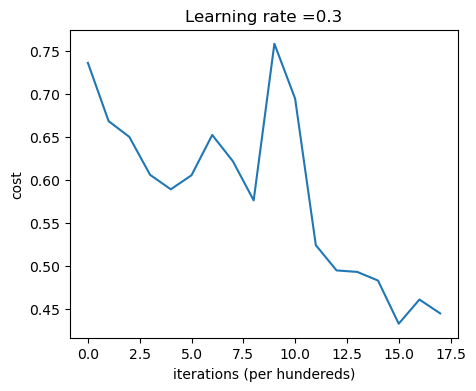

On the train set:
Accuracy: 0.49839914621131276
On the test set:
Accuracy: 0.5047923322683705


In [20]:
#setup keep probabilities list for layers
keep_prob = [1, 0.86, 0.86, 1, 1]
layer_dims = [12288, 20, 7, 5, 1] #  4-layer model (input-layer, 3 hidden-layers + 1 output=layer)
parameters, costs = L_layer_model_with_do(train_x, train_y, layer_dims, keep_prob=keep_prob, learning_rate=0.03, num_iterations=2500, initialization = "he")

plot_costs(costs, learning_rate=0.3)
print ("On the train set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

<frozen dnn_functions>:258: RuntimeWarning: invalid value encountered in log
C:\Users\User\AppData\Local\Temp\ipykernel_19464\377696673.py:27: RuntimeWarning: divide by zero encountered in divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
C:\Users\User\AppData\Local\Temp\ipykernel_19464\377696673.py:27: RuntimeWarning: invalid value encountered in divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 999: nan


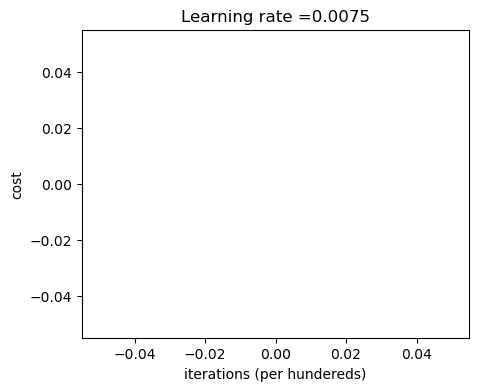

On the train set:
Accuracy: 0.49839914621131276
On the test set:
Accuracy: 0.5047923322683705


In [21]:
# Setup new layer dimensions for a 5-layer NN (input layer + 5 layers) and the layer keep probabilities
keep_prob = [0.5, 0.5, 0.6, 0.7, 0.9, 1]
layer_dims = [12288, 40, 17, 11, 5, 1]
parameters, costs = L_layer_model_with_do(train_x, train_y, layer_dims, keep_prob=keep_prob, learning_rate=0.0075, num_iterations=1000, initialization = "he")

plot_costs(costs, learning_rate=0.0075)
print ("On the train set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

<a name='6'></a>
##  6 - Results Analysis

First, take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

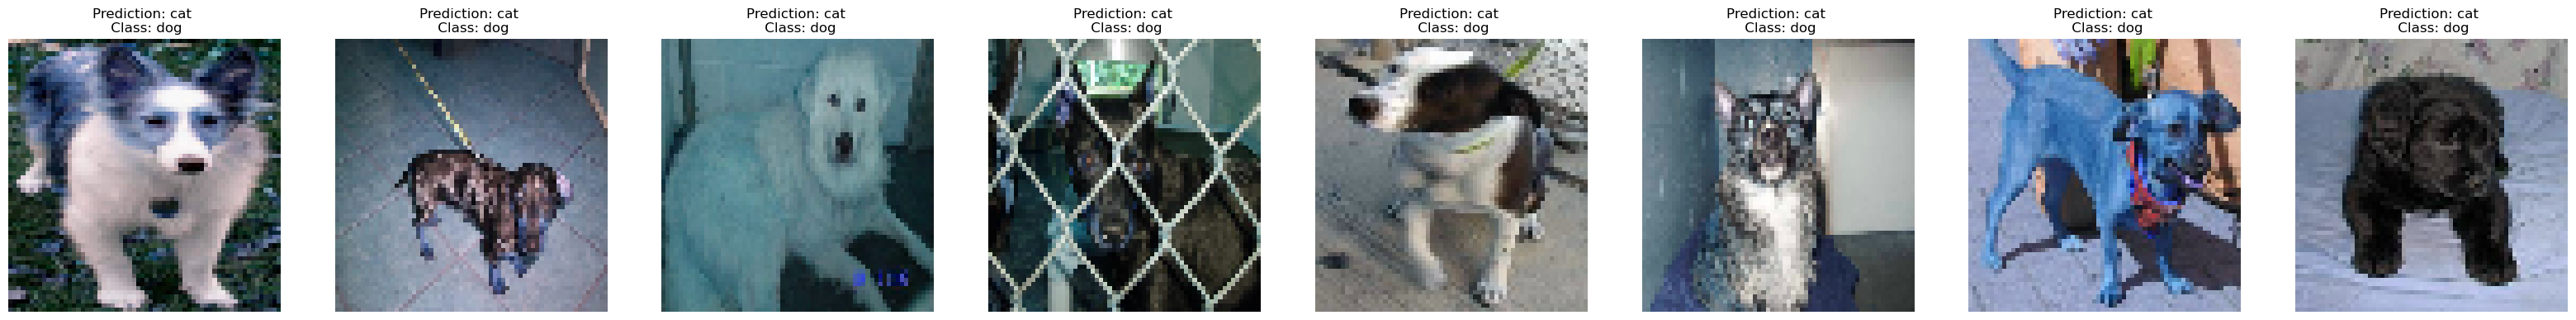

In [22]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

**A few types of images the model tends to do poorly on include:** 
- Animal body in an unusual position
- Animal appears against a background of a similar color
- Unusual animal color and species
- Camera angle
- Brightness of the picture
- Scale variation (dog/cat is very large or small in image) 

### Congratulations on finishing this assignment! 

You just built and trained a deep L-layer neural network, and applied it in order to distinguish dogs from non-dogs,a good introduction to deep learning. ;) 

Amazing work! If you'd like to test out further - there's an optional ungraded exercise below, where you can test your own image. 

<a name='7'></a>
## 7 - Test with your own image (optional/ungraded exercise) ##

From this point, if you so choose, you can use your own image to test  the output of your model. To do that follow these steps:

1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your home directory.
2. Add your image to this Jupyter Notebook's directory, in the "images" folder
3. Change your image's name in the following code
4. Run the code and check if the algorithm is right (0 = cat, 1 = dog)!

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "cat" picture.


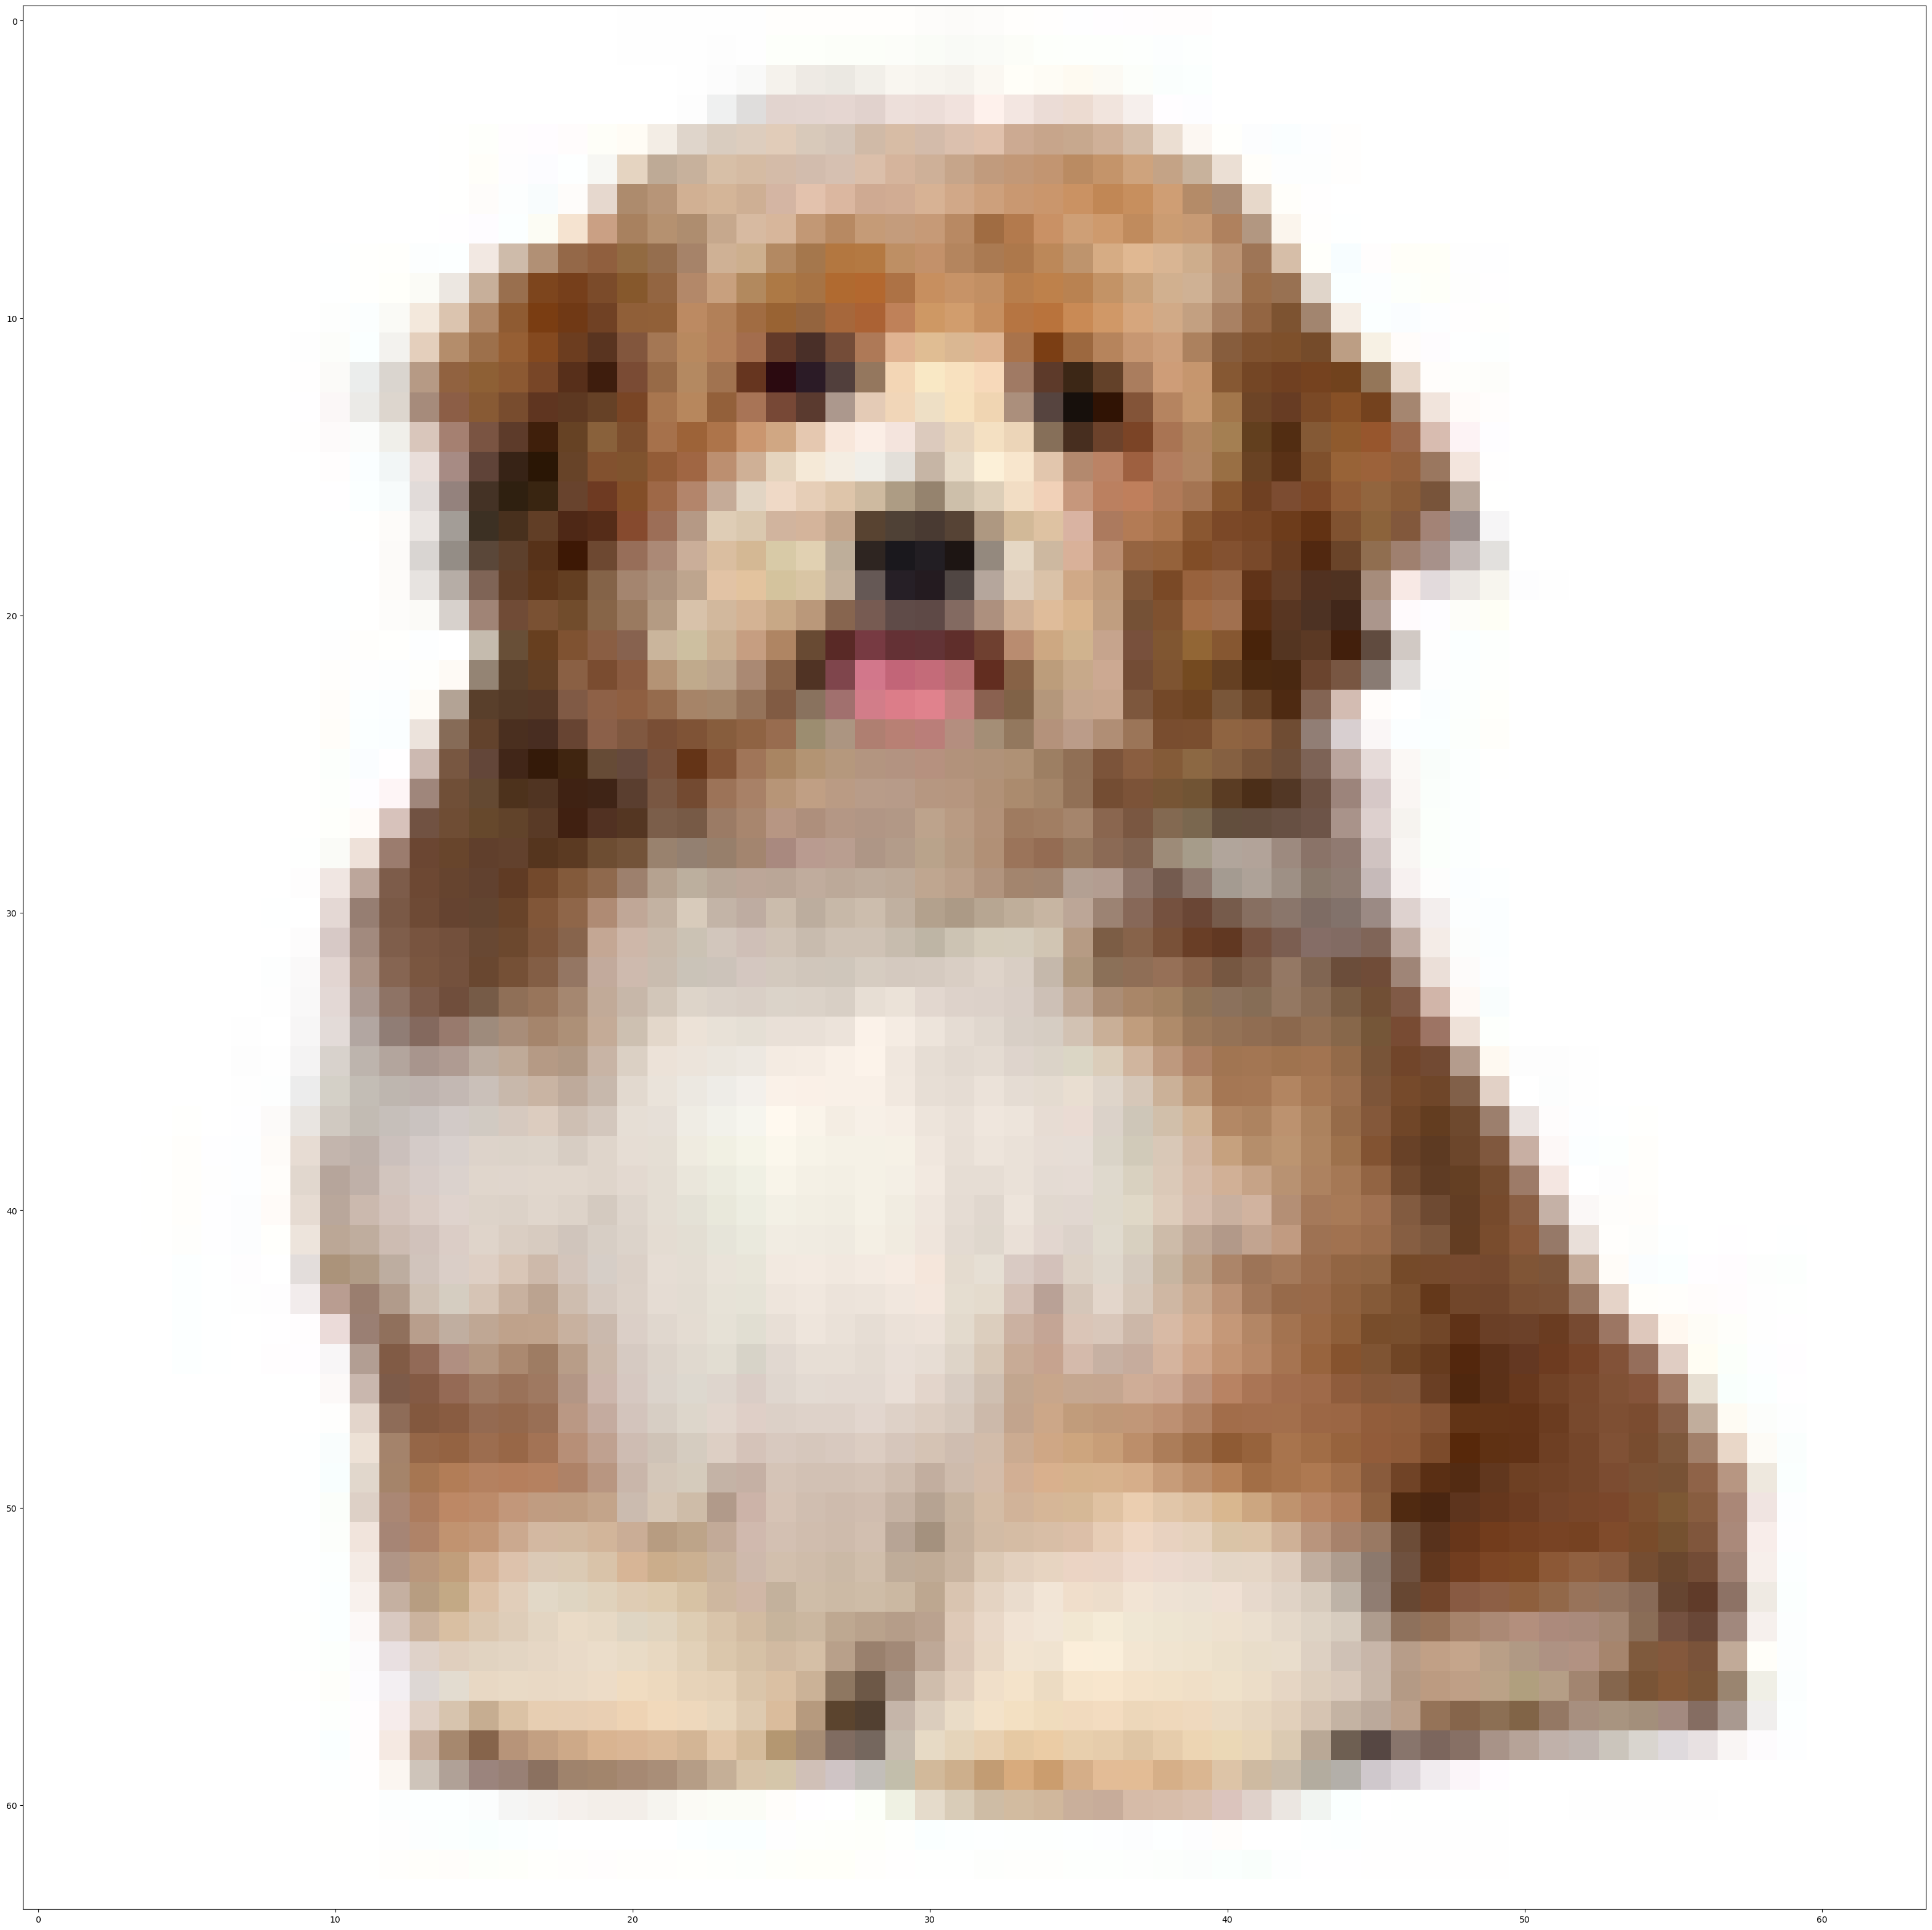

In [27]:
## MODIFY THIS CODE HERE ##
my_image = "my_image_dog.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (0 -> cat, 1 -> dog )
## MODIFICATION ENDS HERE ##

fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)

image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image))] +  "\" picture.")

**References**:

- Xavier Initialization: https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
- He Initialization: https://arxiv.org/abs/1502.01852